In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from losses import SharpeLoss

/home/arnav0400/anaconda3/envs/portfolio/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
w_t = torch.load("weights_best_train")
w_e = torch.load("weights_best_eval")

In [3]:
w_t.shape

torch.Size([64, 300, 92])

In [4]:
import glob
stocks = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ASML', 'ATVI', 'AVGO', 'AZN', 'BIDU', 'BIIB', 'BKNG', 'CDNS', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EBAY', 'ENPH', 'EXC', 'FAST', 'FISV', 'FTNT', 'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KHC', 'KLAC', 'LRCX', 'LULU', 'MAR', 'MCHP', 'MDLZ', 'MELI', 'META', 'MNST', 'MRVL', 'MSFT', 'MTCH', 'MU', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'ODFL', 'ORLY', 'PANW', 'PAYX', 'PCAR', 'PEP', 'PYPL', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SGEN', 'SIRI', 'SNPS', 'SPLK', 'SWKS', 'TEAM', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'WDAY', 'XEL']
path = glob.glob("data/nasdaq100/*")
df = pd.read_csv(path[0], parse_dates=['Date'])
df = df[[df.columns[0], df.columns[4]]]
for i in range(1, len(path)):
    temp = pd.read_csv(path[i], parse_dates=['Date'])
    if temp.Name[0] in stocks:
        df = pd.merge(df, temp[["Date", "Close"]], on=['Date'], how='outer', )
df.sort_values(by=['Date'], inplace=True)

/tmp/ipykernel_8762/1342335554.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, temp[["Date", "Close"]], on=['Date'], how='outer', )
/tmp/ipykernel_8762/1342335554.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, temp[["Date", "Close"]], on=['Date'], how='outer', )
/tmp/ipykernel_8762/1342335554.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, temp[["Date", "Close"]], on=['Date'], how='outer', )
/tmp/ipykernel_8762/1342335554.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, t

In [5]:
start_date = "2015-12-31"
mid_date = "2016-12-31"
end_date = "2017-12-31"

df.fillna(0,inplace=True)
df = df[df.Date >= start_date]
df = df[df.Date <= end_date]
# df.reset_index(inplace=True, drop=True)

past_values = df[df.Date <= mid_date]
future_values = df[df.Date > mid_date]

idx_pr = past_values.shape[0]-1
price_list = pd.concat([past_values, future_values])
price_list.reset_index(inplace=True, drop=True)
price_list.drop(columns=["Date"], inplace=True)
price_list = price_list.iloc[idx_pr:idx_pr+246, :]

price_list = price_list.values

In [6]:
print(price_list.shape, w_t.shape)

(246, 92) torch.Size([64, 300, 92])


In [7]:
device = torch.device('cuda')
price_list = np.expand_dims(price_list, axis=0)
price_list = torch.Tensor(price_list).to(device)
price_list.shape

torch.Size([1, 246, 92])

In [8]:
sz = torch.Tensor([[251]]).to(device).int()
loss = SharpeLoss()
for i in range(w_t.shape[0]):
    # print(w_t[0].unsqueeze(0).shape, price_list.shape, sz.shape, sz)
    print(loss(w_t[i].unsqueeze(0), price_list, sz))

(tensor(-0.1604, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.1628e-05))
(tensor(-0.1710, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.2144e-05))
(tensor(-0.1781, grad_fn=<MulBackward0>), tensor(0.0013), tensor(5.1905e-05))
(tensor(-0.1693, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.3060e-05))
(tensor(-0.1793, grad_fn=<MulBackward0>), tensor(0.0013), tensor(5.1904e-05))
(tensor(-0.1748, grad_fn=<MulBackward0>), tensor(0.0013), tensor(5.2233e-05))
(tensor(-0.1724, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.1880e-05))
(tensor(-0.1702, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.3492e-05))
(tensor(-0.1694, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.3881e-05))
(tensor(-0.1709, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.1474e-05))
(tensor(-0.1692, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.2380e-05))
(tensor(-0.1684, grad_fn=<MulBackward0>), tensor(0.0012), tensor(5.2073e-05))
(tensor(-0.1655, grad_fn=<MulBackward0>), tensor(0.0012), tensor

torch.Size([1, 300, 92]) torch.Size([1, 246, 92]) torch.Size([1])


In [62]:
w_t[0].unsqueeze(0).shape

torch.Size([1, 300, 92])

In [63]:
price_list.shape

torch.Size([1, 246, 92])

In [5]:
stocks = pd.read_csv("data/nasdaq100.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'nasdaq100.csv'

In [3]:
w_t.shape

torch.Size([64, 300, 92])

In [4]:
w_e.shape

torch.Size([1, 300, 92])

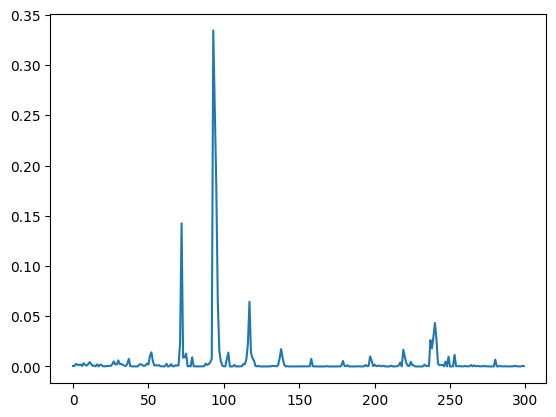

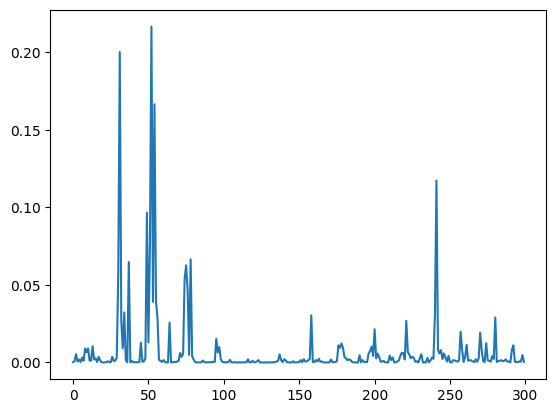

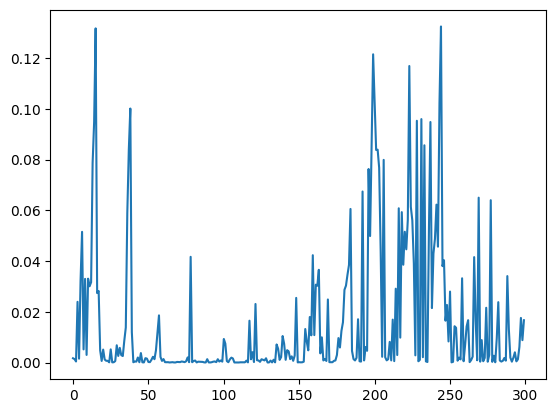

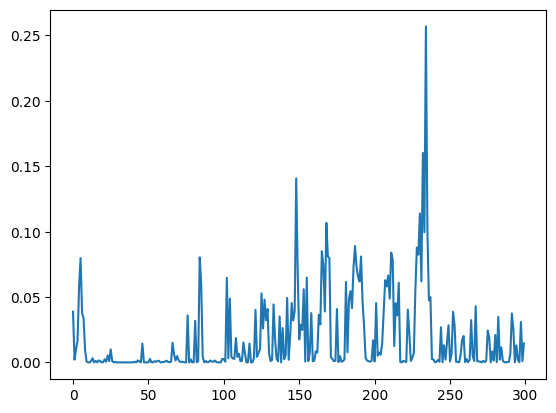

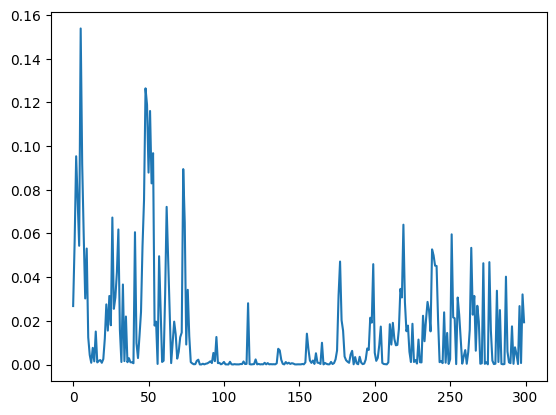

In [10]:
%matplotlib inline
for i in range(5):
    stock_year_weight_train = w_t[i][:, 0].detach().cpu().numpy()
    plt.plot(stock_year_weight_train)
    plt.show()

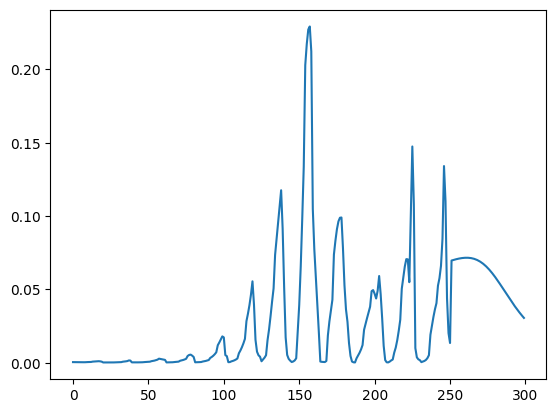

In [7]:
for i in range(w_e.shape[0]):
    stock_year_weight_eval = w_e[i][:, 0].detach().cpu().numpy()
    plt.plot(stock_year_weight_eval)
    plt.show()